
**kütüphaneleri import et**


In [ ]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score



CSV dosyasını yüklemek

In [ ]:
df = pd.read_csv('/content/drive/My Drive/archive/parkinsons_disease_data.csv')

In [ ]:
X=df[[ 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking','AlcoholConsumption',
      'PhysicalActivity', 'DietQuality','SleepQuality','FamilyHistoryParkinsons',
      'Hypertension','Diabetes','Depression', 'Stroke','SystolicBP', 'DiastolicBP',
       'CholesterolTotal','CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
       'UPDRS', 'MoCA', 'FunctionalAssessment','Tremor','Rigidity','Bradykinesia','PosturalInstability','SpeechProblems','SleepDisorders','Constipation']].values
X[0:5]

array([[8.50000000e+01, 0.00000000e+00, 3.00000000e+00, 1.00000000e+00,
        1.96198780e+01, 0.00000000e+00, 5.10824061e+00, 1.38065992e+00,
        3.89396914e+00, 9.28319445e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.29000000e+02,
        6.00000000e+01, 2.22842278e+02, 1.48125623e+02, 3.78677764e+01,
        3.37307114e+02, 6.45871295e+00, 2.91812893e+01, 1.57242719e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.50000000e+01, 0.00000000e+00, 0.00000000e+00, 2.00000000e+00,
        1.62473392e+01, 1.00000000e+00, 6.02764803e+00, 8.40980405e+00,
        8.51342825e+00, 5.60246951e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.63000000e+02,
        7.60000000e+01, 2.10501133e+02, 1.53756463e+02, 7.72281169e+01,
        2.64635521e+02, 3.73067027e+01, 1.23326393e+01, 4.78755129e+00,
       

In [ ]:
Y = df['Diagnosis'].values
Y[0:5]

array([0, 1, 1, 1, 0])

**VERİLERİ NORMALİZASYONU**
* Veri normalizasyonu , farklı ölçeklerdeki verilerin aynı ölçeğe (genellikle belirli bir aralığa) getirilmesi işlemidir.
KNN gibi noktalar arası mesafe temelli algoritmalardan daha başarılı sonuç elde etmek için veriler normalize edilir.


In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 1.32836632, -0.98538002,  2.29911242, -0.37659874, -1.05317897,
        -0.64910472, -0.86747533, -1.25803542, -0.35485132,  1.30462869,
        -0.41321335, -0.41321335, -0.41714511, -0.50815231, -0.22682273,
        -0.17812894, -1.77341326, -0.09221316,  0.50643834, -0.93311499,
         1.12265437, -1.67833076,  1.63025574, -1.16503839,  1.14705343,
        -0.58155588, -0.51184999, -0.40132159, -0.64688763, -0.56985308,
        -0.64984406],
       [ 0.46568434, -0.98538002, -0.69015975,  0.73993696, -1.52117201,
         1.54058347, -0.70576905,  1.17399894,  1.25391331, -0.79546429,
        -0.41321335, -0.41321335, -0.41714511, -0.50815231, -0.22682273,
         1.10508075, -0.83540587, -0.37540301,  0.63619099,  0.75144399,
         0.40928988, -1.13310139, -0.31960269, -0.06891596, -0.87179897,
         1.7195252 , -0.51184999,  2.49176727, -0.64688763,  1.75483827,
        -0.64984406],
       [ 0.03434335,  1.0148369 , -0.69015975, -1.49313445, -1.64316109,
       

Bu kod satırı çalıştırıldığında, X değişkenindeki veri seti, her bir özelliğin ortalaması 0 ve standart sapması 1 olacak şekilde dönüştürülür. Bu sayede, farklı ölçeklerde olan özellikler aynı ağırlıkta değerlendirilir ve modelin daha iyi genelleme yapması sağlanır.

**Veri Setini Eğitim ve Test Veriseti Olarak Ayırma**
* train_test_split fonksiyonu ile holdout yöntemi kullanılarak veri kümesi rastgele olarak eğitim ve test setlerine ayrılmaktadır.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.25, random_state=0)
print("Train set:",X_train.shape, y_train.shape)
print("Test set:",X_test.shape, y_test.shape)

Train set: (1578, 31) (1578,)
Test set: (527, 31) (527,)


1.   **train_test_split**: sklearn.model_selection modülünden gelen bu fonksiyon, veri kümesini eğitim ve test setlerine ayırmak için kullanılır.
*   X_train: Eğitim setinin özellikleri
*   X_test: Test setinin özellikleri
*   y_train: Eğitim setinin hedef değişkeni
*   y_test: Test setinin hedef değişkeni
2.   **X, Y**: Sırasıyla bağımsız değişkenler (öznitelikler) ve bağımlı değişken (hedef değişken) içeren veri kümeleridir.
3.   **test_size=0.2**: Veri kümesinin %20'sinin test setine, geri kalan %80'inin ise eğitim setine ayrılmasını belirtir.
4.   **random_state=4**: Her çalıştırmada aynı rastgele bölünmeyi elde etmek için kullanılan bir sabit sayıdır. Bu sayede sonuçlar tekrarlanabilir hale gelir.





***KNN***

*Eğitim*

In [ ]:
k=4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)


En yakın 4 komşu içerisindeki yoğunluğa göre karar verecek.



*Tahmin*

In [ ]:
y_hat=neigh.predict(X_test)
y_hat[0:5]

array([1, 0, 1, 0, 0])

*KNN Algoritması Performansı*

In [ ]:
print("Eğitim verisi doğruluğu:", metrics.accuracy_score(y_train,neigh.predict(X_train)))
print("Test verisi doğruluğu:",metrics.accuracy_score(y_test,y_hat))

Eğitim verisi doğruluğu: 0.8111533586818758
Test verisi doğruluğu: 0.6869070208728653


En iyi k değerini bulmak

In [ ]:
Ks=30
mean_acc =np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):

  neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
  y_hat=neigh.predict(X_test)
  mean_acc[n-1]=metrics.accuracy_score(y_test,y_hat)
  std_acc[n-1]=np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])
mean_acc

array([0.64705882, 0.61480076, 0.72675522, 0.68690702, 0.73814042,
       0.72296015, 0.75332068, 0.71726755, 0.75711575, 0.75901328,
       0.78747628, 0.77988615, 0.75521822, 0.76850095, 0.77798861,
       0.77988615, 0.78747628, 0.79127135, 0.78937381, 0.79506641,
       0.80265655, 0.79127135, 0.78937381, 0.79696395, 0.78368121,
       0.80265655, 0.79316888, 0.79696395, 0.78747628])

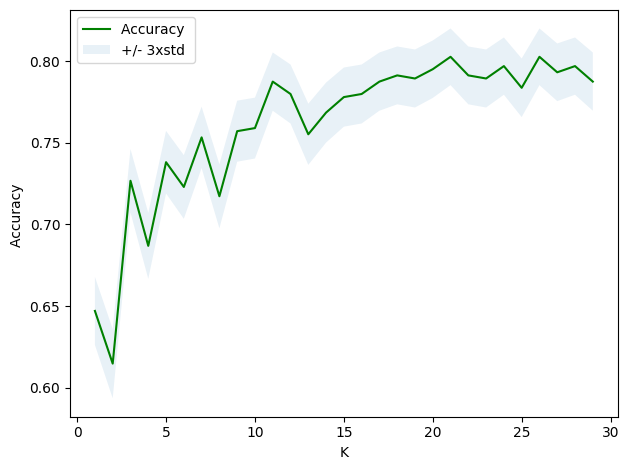

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('K')
plt.tight_layout()
plt.show()

In [ ]:
print("En yüksek doğruluk:", mean_acc.max(),"en iyi k değeri:",mean_acc.argmax()+1, "olduğunda gerçekleşti.")

En yüksek doğruluk: 0.8026565464895635 en iyi k değeri: 21 olduğunda gerçekleşti.


In [ ]:
k=21
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
print("Eğitim verisi doğruluğu:", metrics.accuracy_score(y_train,neigh.predict(X_train)))
print("Test verisi doğruluğu:",metrics.accuracy_score(y_test,y_hat))

Eğitim verisi doğruluğu: 0.8060836501901141
Test verisi doğruluğu: 0.7874762808349146


**Duyarlılık ve Özgüllük**  


In [ ]:
# Tahminleri oluştur
y_pred = neigh.predict(X_test)

# Karışıklık matrisi
cm = confusion_matrix(y_test, y_pred)

# Karışıklık matrisinden metrikleri hesapla
TN, FP, FN, TP = cm.ravel()

sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print("Duyarlılık (Sensitivity):", sensitivity)
print("Özgüllük (Specificity):", specificity)


Duyarlılık (Sensitivity): 0.8964497041420119
Özgüllük (Specificity): 0.6349206349206349


**F1 Skoru**  

In [ ]:
f1 = f1_score(y_test, y_pred)
print("F1 Skoru:", f1)


F1 Skoru: 0.8535211267605634


**Cohen's Kappa**

In [ ]:
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa:", kappa)

Cohen's Kappa: 0.5533097524002021


**ROC EĞRİSİ VE AUC DEĞERİ**

AUC: 0.8518909865063711


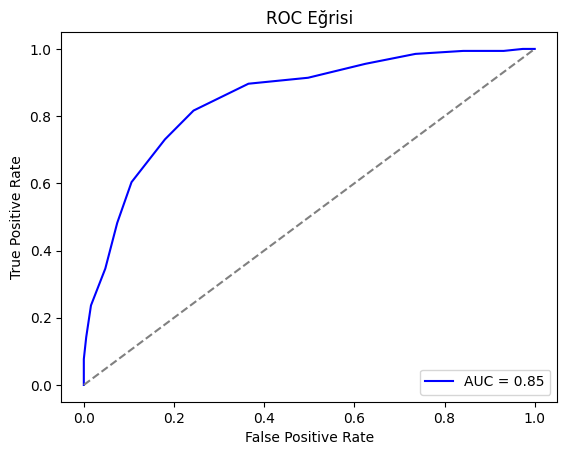

In [ ]:
y_proba = neigh.predict_proba(X_test)[:, 1]  # Pozitif sınıf için olasılıklar
auc = roc_auc_score(y_test, y_proba)

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
print("AUC:", auc)

# ROC eğrisi çizimi
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.63      0.70       189
           1       0.81      0.90      0.85       338

    accuracy                           0.80       527
   macro avg       0.79      0.77      0.78       527
weighted avg       0.80      0.80      0.80       527



**Karışıklık Matrisi**

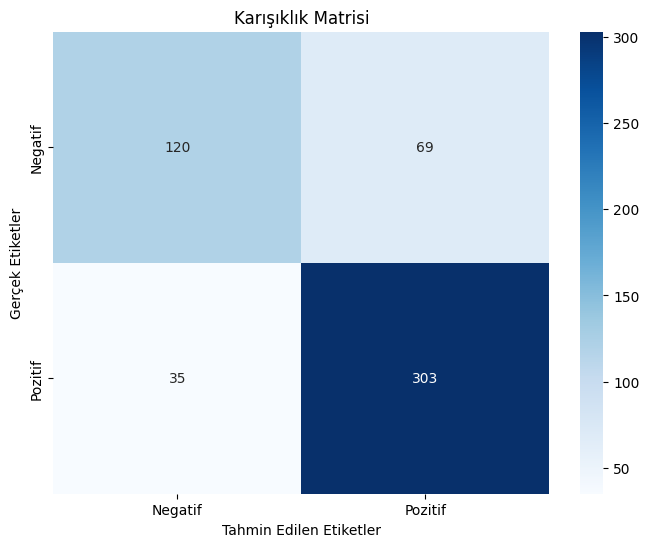

In [ ]:
# Tahminleri oluştur
y_pred = neigh.predict(X_test)

# Karışıklık matrisini hesapla
cm = confusion_matrix(y_test, y_pred)

# Karışıklık matrisini görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title('Karışıklık Matrisi')
plt.show()
